<H1><b><center>  Flight Delay Prediction Using Machine Learning Project </h1></b> </center>


<h3><b> Import Libraries: </h3></b>

In [87]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings("ignore")


<h3><b>Importing dataset: </h3></b>



In [88]:
df = pd.read_csv('M1_final.csv')

<h3><b> Data Overview: </h3></b>

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [90]:
df.shape

(28820, 23)

In [91]:
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


 <h3><b> Data Preprocessing: </h3></b>

*   Handling Missing Values
*   Check Duplicates Values
*   Data formatting
*   Feature Engineering

*  <b> Handling Missing Values </b>

In [92]:
print("Null Values:", df.isnull().sum())

Null Values: MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64


*  <b> Correlation matrix  </b>

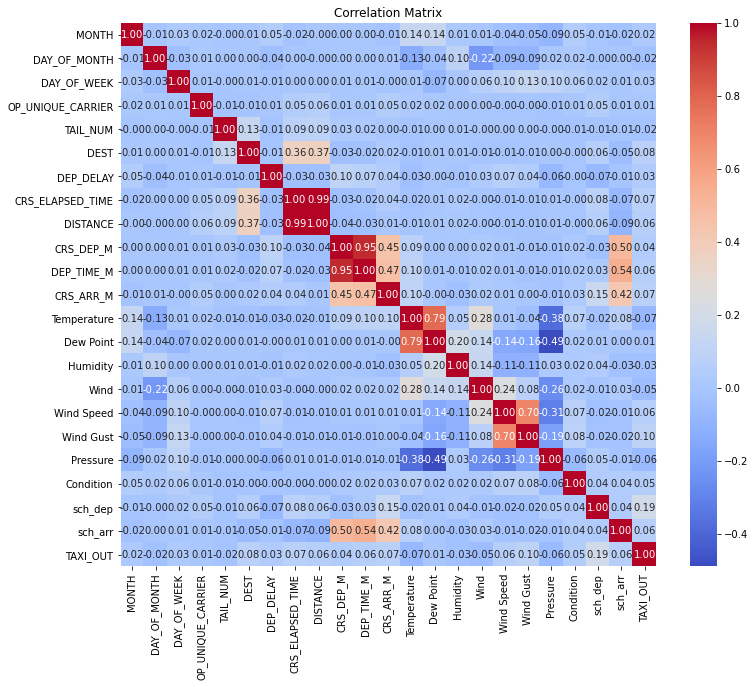

In [93]:
# Make a copy of the dataset to avoid modifying the original dataset
encoded_dataset = df.copy()

# Encode categorical columns
label_encoders = {}
for col in ['OP_UNIQUE_CARRIER', 'TAIL_NUM', 'DEST', 'Wind', 'Condition']:
    label_encoders[col] = LabelEncoder()
    encoded_dataset[col] = label_encoders[col].fit_transform(df[col])

# Calculate the correlation matrix
corr_matrix = encoded_dataset.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [94]:
# Drop 'TAIL_NUM' column
# Drop rows with null values
df.dropna(inplace=True)
df.drop('TAIL_NUM', axis=1, inplace=True)

*  <b> Check Duplicates Values </b>

In [95]:
df["Dew Point"] = df["Dew Point"].astype("int64")

# Let's check if this fixed it.
df.select_dtypes(["object_"]).head()

,OP_UNIQUE_CARRIER,DEST,Wind,Condition
0,B6,CHS,W,Fair / Windy
1,B6,LAX,W,Fair / Windy
2,B6,FLL,W,Fair / Windy
3,B6,MCO,W,Fair / Windy
4,DL,ATL,W,Fair / Windy


In [96]:
# Count the number of duplicated rows
print("Number of duplicated rows:",df.duplicated().sum() )

Number of duplicated rows: 0


*  <b> Data formatting</b>

In [97]:
new_column_names = {
    'MONTH': 'Month',
    'DAY_OF_MONTH': 'DayOfMonth',
    'DAY_OF_WEEK': 'DayOfWeek',
    'OP_UNIQUE_CARRIER': 'Carrier',
    'TAIL_NUM': 'FlightNumber',
    'DEST': 'Destination',
    'DEP_DELAY': 'DepartureDelay',
    'CRS_ELAPSED_TIME': 'ScheduledJourneyTime',
    'DISTANCE': 'Distance',
    'CRS_DEP_M': 'ScheduledDepartureTime',
    'DEP_TIME_M': 'ActualDepartureTime',
    'CRS_ARR_M': 'ScheduledArrivalTime',
    'Temperature': 'Temperature',
    'Dew Point': 'DewPoint',
    'Humidity': 'Humidity',
    'Wind': 'WindDirection',
    'Wind Speed': 'WindSpeed',
    'Wind Gust': 'WindGust',
    'Pressure': 'Pressure',
    'Condition': 'WeatherCondition',
    'sch_dep': 'ScheduledDepartureFlights',
    'sch_arr': 'ScheduledArrivalFlights',
    'TAXI_OUT': 'TaxiOutTime'
}

df.rename(columns=new_column_names, inplace=True)



*  <b> Feature Engineering  </b>


In [98]:
# Convert 'DEW_POINT' to integer
df['DewPoint'] = df['DewPoint'].astype(int)

In [99]:
# Encode categorical variables to numerical
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [100]:
# Create binary variable 'IS_DELAY'
df['IS_DELAY'] = df['DepartureDelay'].apply(lambda x: 1 if x > 15 else 0)

In [101]:
df.head(5)

,Month,DayOfMonth,DayOfWeek,Carrier,Destination,DepartureDelay,ScheduledJourneyTime,Distance,ScheduledDepartureTime,ActualDepartureTime,...,Humidity,WindDirection,WindSpeed,WindGust,Pressure,WeatherCondition,ScheduledDepartureFlights,ScheduledArrivalFlights,TaxiOutTime,IS_DELAY
0,11,1,5,3,10,-1,124,636,324,323,...,58,15,25,38,29.86,4,9,17,14,0
1,11,1,5,3,28,-7,371,2475,340,333,...,58,15,25,38,29.86,4,9,17,15,0
2,11,1,5,3,20,40,181,1069,301,341,...,58,15,25,38,29.86,4,9,17,22,1
3,11,1,5,3,30,-2,168,944,345,343,...,58,15,25,38,29.86,4,9,17,12,0
4,11,1,5,4,1,-4,139,760,360,356,...,58,15,24,35,29.91,4,9,17,13,0


<h3><b> Exploratory Data Analysis (EDA): </h3></b>


 *    Summary Statistics
 *    Data visualization
 


*  <b> Summary Statistics  </b>

In [102]:
df.describe()

,Month,DayOfMonth,DayOfWeek,Carrier,Destination,DepartureDelay,ScheduledJourneyTime,Distance,ScheduledDepartureTime,ActualDepartureTime,...,Humidity,WindDirection,WindSpeed,WindGust,Pressure,WeatherCondition,ScheduledDepartureFlights,ScheduledArrivalFlights,TaxiOutTime,IS_DELAY
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,...,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,2.828441,31.019224,6.373239,225.294399,1267.787494,830.970470,828.898987,...,57.732806,9.577209,12.368485,5.535707,30.092410,10.370741,31.091956,28.431813,20.857207,0.134395
std,4.991779,8.750448,1.985299,1.865352,18.727287,38.735195,119.483432,889.354031,299.381938,305.844666,...,23.469480,5.100893,6.258667,11.886780,0.296158,7.273624,9.510317,8.263242,6.850197,0.341082
min,1.000000,1.000000,1.000000,0.000000,0.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,1.000000,8.000000,2.000000,1.000000,15.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,...,46.000000,6.000000,8.000000,0.000000,29.880000,3.000000,26.000000,21.000000,16.000000,0.000000
50%,11.000000,16.000000,4.000000,3.000000,28.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,...,59.000000,9.000000,12.000000,0.000000,30.110000,16.000000,30.000000,30.000000,19.000000,0.000000
75%,12.000000,24.000000,6.000000,4.000000,48.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,...,74.000000,15.000000,16.000000,0.000000,30.320000,16.000000,37.000000,35.000000,25.000000,0.000000
max,12.000000,31.000000,7.000000,8.000000,64.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,...,97.000000,17.000000,36.000000,49.000000,30.750000,24.000000,55.000000,46.000000,41.000000,1.000000


*  <b> Data visualization  </b>

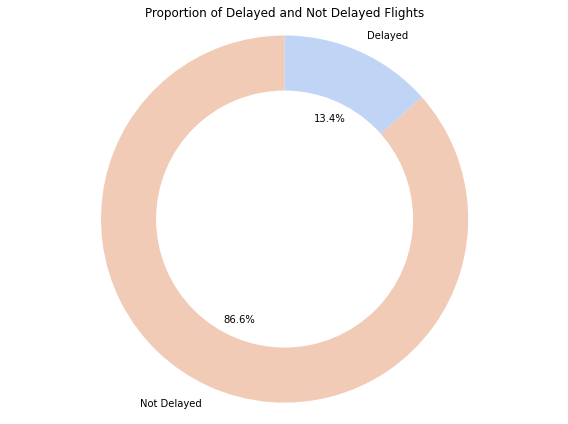

In [103]:
# Calculate delay counts
delay_counts = df['IS_DELAY'].value_counts()

# Create a donut plot with 'coolwarm' colormap
plt.figure(figsize=(8, 6))
plt.pie(delay_counts, labels=['Not Delayed', 'Delayed'], autopct='%1.1f%%', startangle=90, colors=plt.cm.coolwarm([0.6, 0.4]))
plt.title('Proportion of Delayed and Not Delayed Flights')
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.tight_layout()
plt.show()


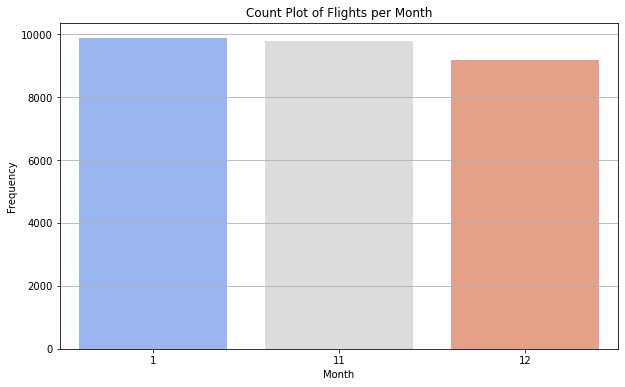

In [104]:
#number of flights that occurred in a particular month
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='coolwarm')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Count Plot of Flights per Month')
plt.grid(axis='y')
plt.show()


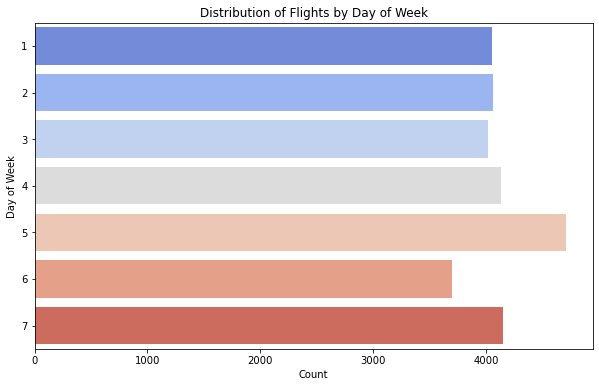

In [105]:
# Plot bar chart of DAY_OF_WEEK distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='DayOfWeek', data=df, palette='coolwarm')
plt.title('Distribution of Flights by Day of Week')
plt.xlabel('Count')
plt.ylabel('Day of Week')
plt.show()


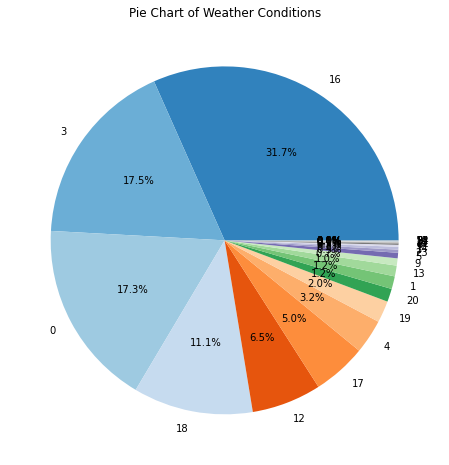

In [106]:
plt.figure(figsize=(12, 8))
df['WeatherCondition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20c.colors)
plt.title('Pie Chart of Weather Conditions')
plt.ylabel('')
plt.show()


<h3><b> Build the model : </h3></b>

* Feature Selection
* Model Selection (lazypredict) 
* split the data 
* Train and Test the model
* confusion matrix


*  <b> Feature Selection  </b>

In [107]:
# Split dataset into features and target variable
X = df.drop(['IS_DELAY', 'DepartureDelay'], axis=1)
y = df['IS_DELAY']

In [108]:
# Initialize and train the ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to associate features with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                      Feature  Importance
7      ScheduledDepartureTime    0.138555
8         ActualDepartureTime    0.131775
9        ScheduledArrivalTime    0.087104
5        ScheduledJourneyTime    0.065985
6                    Distance    0.059058
20                TaxiOutTime    0.058969
4                 Destination    0.057413
3                     Carrier    0.051335
19    ScheduledArrivalFlights    0.047006
18  ScheduledDepartureFlights    0.044914
16                   Pressure    0.031868
10                Temperature    0.028087
11                   DewPoint    0.027023
14                  WindSpeed    0.026970
12                   Humidity    0.026495
13              WindDirection    0.023580
1                  DayOfMonth    0.023073
17           WeatherCondition    0.021012
2                   DayOfWeek    0.020292
0                       Month    0.017949
15                   WindGust    0.011538


In [109]:
# Print the first 6 important features
print("Top 6 important features:")
top_imoprtant=feature_importance_df.head(6)
print(top_imoprtant)

Top 6 important features:
                   Feature  Importance
7   ScheduledDepartureTime    0.138555
8      ActualDepartureTime    0.131775
9     ScheduledArrivalTime    0.087104
5     ScheduledJourneyTime    0.065985
6                 Distance    0.059058
20             TaxiOutTime    0.058969


In [110]:
top_imoprtant['Feature']

7     ScheduledDepartureTime
8        ActualDepartureTime
9       ScheduledArrivalTime
5       ScheduledJourneyTime
6                   Distance
20               TaxiOutTime
Name: Feature, dtype: object

*  <b> lazypredict  </b>

In [96]:
# Define feature names based on importance
features = feature_importance_df['Feature'].tolist()

# Assign the target variable
target = 'IS_DELAY'

# Extracting features and target variable from the DataFrame
X = df[features]
y = df[target]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [157]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier

clf = LazyClassifier()
 
# Fit LazyClassifier on the training data

models_summary = clf.fit(X_train, X_test, y_train, y_test )
 
models_summary

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [06:40<00:05,  5.63s/it]

[LightGBM] [Info] Number of positive: 3076, number of negative: 19978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1771
[LightGBM] [Info] Number of data points in the train set: 23054, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.133426 -> initscore=-1.871002
[LightGBM] [Info] Start training from score -1.871002


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [06:41<00:00, 13.83s/it]


(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 XGBClassifier                      0.98               0.95     0.95      0.98   
 LGBMClassifier                     0.98               0.93     0.93      0.98   
 DecisionTreeClassifier             0.97               0.93     0.93      0.97   
 BaggingClassifier                  0.98               0.93     0.93      0.98   
 QuadraticDiscriminantAnalysis      0.91               0.69     0.69      0.89   
 RandomForestClassifier             0.91               0.69     0.69      0.89   
 ExtraTreesClassifier               0.90               0.66     0.66      0.88   
 SVC                                0.89               0.62     0.62      0.87   
 ExtraTreeClassifier                0.82               0.62     0.62      0.82   
 LabelPropagation                   0.82               0.59     0.59      0.81   
 LabelSpreading 

*  <b> split the data   </b>

In [111]:
features = feature_importance_df['Feature']
target = 'IS_DELAY'

 
# Split the data into features (X) and target variable (y)
X = df[features]
y = df[target]
 
# First, split the data into training (80%) and temporary set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [112]:
# Shape of training data
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  

# Shape of test data
print("X_test shape:", X_test.shape)    
print("y_test shape:", y_test.shape)  

X_train shape: (23054, 21)
y_train shape: (23054,)
X_test shape: (5764, 21)
y_test shape: (5764,)


*  <b> Train and Test the model   </b>

<b>RandomForest</b>

In [113]:
# Train Random Forest Classifier

clf = RandomForestClassifier(random_state=42)

clf.fit(X_train, y_train)
 
# Make predictions

y_pred = clf.predict(X_test)
 
# Evaluate model

print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy: 0.9096113809854268
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4967
           1       0.91      0.38      0.54       797

    accuracy                           0.91      5764
   macro avg       0.91      0.69      0.74      5764
weighted avg       0.91      0.91      0.89      5764



<b>DecisionTree</b>

In [114]:
# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9684247050659265
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4967
           1       0.89      0.88      0.88       797

    accuracy                           0.97      5764
   macro avg       0.94      0.93      0.93      5764
weighted avg       0.97      0.97      0.97      5764



<b>LogisticRegression</b>

In [115]:
# Initialize Logistic Regression Classifier
clf = LogisticRegression(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8643303261623873
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4967
           1       0.89      0.02      0.04       797

    accuracy                           0.86      5764
   macro avg       0.88      0.51      0.48      5764
weighted avg       0.87      0.86      0.80      5764



*  <b> Confusion matrix   </b>

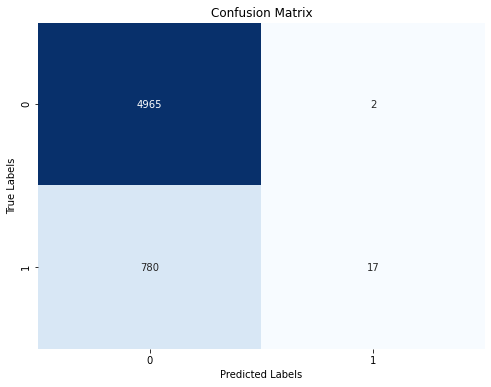

In [116]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


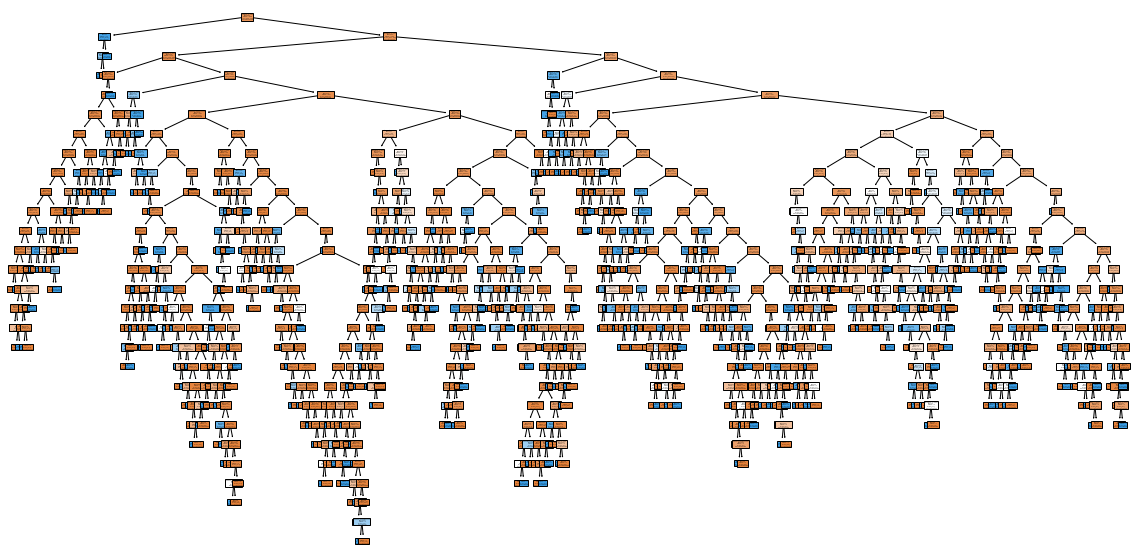

In [117]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create and train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=features, class_names=['Not Delayed', 'Delayed'])
plt.show()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28818 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      28818 non-null  int64  
 1   DayOfMonth                 28818 non-null  int64  
 2   DayOfWeek                  28818 non-null  int64  
 3   Carrier                    28818 non-null  int32  
 4   Destination                28818 non-null  int32  
 5   DepartureDelay             28818 non-null  int64  
 6   ScheduledJourneyTime       28818 non-null  int64  
 7   Distance                   28818 non-null  int64  
 8   ScheduledDepartureTime     28818 non-null  int64  
 9   ActualDepartureTime        28818 non-null  int64  
 10  ScheduledArrivalTime       28818 non-null  int64  
 11  Temperature                28818 non-null  int64  
 12  DewPoint                   28818 non-null  int32  
 13  Humidity                   28818 non-null  int64  


*  <b> GUI   </b>

In [118]:
import tkinter as tk
from tkinter import ttk
def show_data():
    # Get the selected month
    selected_month = month_var.get()
    selected_day_of_month = int(day_of_month_entry.get())
    selected_day_of_week = int(day_of_week_entry.get())

    # Filter the data based on the selected month, day of month, and day of week
    filtered_df = df[(df["MONTH"] == selected_month) & 
                     (df["DAY_OF_MONTH"] == selected_day_of_month) &
                     (df["DAY_OF_WEEK"] == selected_day_of_week)]

    # Determine if any flight on that day was delayed or not based on the departure delay
    delayed_flights = filtered_df[filtered_df["DEP_DELAY"] > 15]
    
    if not delayed_flights.empty:
        delayed_tail_numbers = delayed_flights["TAIL_NUM"].tolist()
        result_label.config(text="Flight Delayed. Tail Numbers:")
        for tail_number in delayed_tail_numbers:
            result_label.config(text=result_label.cget("text") + f"\n{tail_number}")
    else:
        result_label.config(text="No delayed flights on selected day")

# Create the main window
root = tk.Tk()
root.title("Flight Data GUI")
root.geometry("1000x1000")  # Set the size of the window

# Label for the month
month_label = ttk.Label(root, text="Month:")
month_label.pack()

# Radio buttons for selecting the month
month_var = tk.IntVar()
month_var.set(11)  # Default to November
month_frame = ttk.Frame(root)
month_frame.pack()
for month in [11, 12, 1]:
    ttk.Radiobutton(month_frame, text=str(month), variable=month_var, value=month).pack(side="left")

# Inputs for day of the month and day of the week
day_of_month_label = ttk.Label(root, text="Day of Month:")
day_of_month_label.pack()
day_of_month_entry = ttk.Entry(root)
day_of_month_entry.pack()

day_of_week_label = ttk.Label(root, text="Day of Week:")
day_of_week_label.pack()
day_of_week_entry = ttk.Entry(root)
day_of_week_entry.pack()

# Button to show data
show_data_button = ttk.Button(root, text="Show Data", command=show_data)
show_data_button.pack()

# Label to display the result
result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\96277\majd\11\lib\site-packages\pandas\core\indexes\base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'MONTH'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\96277\majd\11\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-118-df81db3a4fda>", line 10, in show_data
    filtered_df = df[(df["MONTH"] == selected_month) &
  File "C:\Users\96277\majd\11\lib\site-

In [123]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
df = pd.read_csv('M1_final.csv')

def show_data():
    selected_month = month_var.get()
    selected_day_of_month = int(day_of_month_entry.get())
    selected_day_of_week = int(day_of_week_entry.get())

    filtered_df = df[(df["MONTH"] == selected_month) &
                     (df["DAY_OF_MONTH"] == selected_day_of_month) &
                     (df["DAY_OF_WEEK"] == selected_day_of_week) &
                     (df["DEP_DELAY"] > 15)]

    if not filtered_df.empty:
        delayed_tail_numbers = filtered_df["TAIL_NUM"].tolist()
        result_label.config(text="Flight Delayed. Tail Numbers:")
        for tail_number in delayed_tail_numbers:
            result_label.config(text=result_label.cget("text") + f"\n{tail_number}")
    else:
        result_label.config(text="No delayed flights on selected day")

# Create the main window
root = tk.Tk()
root.title("Flight Data GUI")
root.geometry("1000x1000")  # Set the size of the window

# Label for the month
month_label = ttk.Label(root, text="Month:")
month_label.pack()

# Radio buttons for selecting the month
month_var = tk.IntVar()
month_var.set(11)  # Default to November
month_frame = ttk.Frame(root)
month_frame.pack()
for month in [11, 12, 1]:
    ttk.Radiobutton(month_frame, text=str(month), variable=month_var, value=month).pack(side="left")

# Inputs for day of the month and day of the week
day_of_month_label = ttk.Label(root, text="Day of Month:")
day_of_month_label.pack()
day_of_month_entry = ttk.Entry(root)
day_of_month_entry.pack()

day_of_week_label = ttk.Label(root, text="Day of Week:")
day_of_week_label.pack()
day_of_week_entry = ttk.Entry(root)
day_of_week_entry.pack()

# Button to show data
show_data_button = ttk.Button(root, text="Show Data", command=show_data)
show_data_button.pack()

# Label to display the result
result_label = ttk.Label(root, text="")
result_label.pack()

root.mainloop()


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288